In [34]:
import networkx as nx 
import matplotlib.pyplot as plt 
import math 
import numpy as np
from random import random 
from numpy import arange

In [23]:
W = 1
L = 1
area = W*L 

In [24]:
def f_a(d, k):
    return d**2/k 

def f_r(d, k):
    return k**2/d

In [25]:
def fruchterman_reingold(G,iteration):
   
    area = W*L
    k = math.sqrt(area/nx.number_of_nodes(G))
    
    t = W/2
    dt = t/(iteration+1)

    for i in range(iteration):
        #print(i, " of ", iteration)
        
        # ALREADY COMPLETED. SEE CODE CELL BELOW.
        G = calculate_repulsive_forces(G, k)
       
        # COMPLETE THIS FUNCTION LATER
        G = calculate_attractive_forces(G, k)
        
        # Limit the maximum displacement to the temperature t
        # and then prevent from being displaced outside frame
        for v in G.nodes():
            dx = G.nodes[v]['dx']
            dy = G.nodes[v]['dy']
            disp = math.sqrt(dx*dx+dy*dy)
            if disp != 0:
                d = min(disp,t)/disp
                x = G.nodes[v]['x'] + dx*d
                y = G.nodes[v]['y'] + dy*d
                x =  min(W,max(0,x)) - W/2
                y =  min(L,max(0,y)) - L/2
                G.nodes[v]['x'] = min(math.sqrt(W*W/4-y*y),max(-math.sqrt(W*W/4-y*y),x)) + W/2
                G.nodes[v]['y'] = min(math.sqrt(L*L/4-x*x),max(-math.sqrt(L*L/4-x*x),y)) + L/2

        # Cooling
        t -= dt

    pos = {}
    for v in G.nodes():
        pos[v] = [G.nodes[v]['x'],G.nodes[v]['y']]
        
    plt.close()
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])
    plt.axis('off')
        
    return pos

In [11]:
def calculate_repulsive_forces(G, k):       
    for v in G.nodes():
        G.nodes[v]['dx'] = 0
        G.nodes[v]['dy'] = 0
        for u in G.nodes():
            if v != u:
                dx = G.nodes[v]['x'] - G.nodes[u]['x']
                dy = G.nodes[v]['y'] - G.nodes[u]['y']
                delta = math.sqrt(dx*dx+dy*dy)
                if delta != 0:
                    d = f_r(delta,k)/delta
                    G.nodes[v]['dx'] += dx*d
                    G.nodes[v]['dy'] += dy*d
    return G

In [26]:
def calculate_attractive_forces(G, k):
    for v, u in G.edges():
        dx = G.nodes[v]['x'] - G.nodes[u]['x']
        dy = G.nodes[v]['y'] - G.nodes[u]['y']
        delta = math.sqrt(dx*dx+dy*dy)
        if delta != 0:
            d = f_a(delta, k) /delta
            G.nodes[v]['dx'] -= dx*d 
            G.nodes[v]['dy'] -= dy*d 
            G.nodes[u]['dx'] += dx*d 
            G.nodes[u]['dy'] += dy*d 
    return G 

N = 5
G = nx.cycle_graph(N)

G.nodes[0]['x'] = 0.8168184889480099
G.nodes[0]['y'] = 0.5311428534216505
G.nodes[1]['x'] = 0.6654594641114429
G.nodes[1]['y'] = 0.7842081286602168
G.nodes[2]['x'] = 0.9229503471222402
G.nodes[2]['y'] = 0.21495774524514744
G.nodes[3]['x'] = 0.1353894225040374
G.nodes[3]['y'] = 0.9657448268419787
G.nodes[4]['x'] = 0.037138912320340944
G.nodes[4]['y'] = 0.578448424341083

for v in G.nodes():
    G.nodes[v]['dx'] = 0
    G.nodes[v]['dy'] = 0

k = math.sqrt(area/nx.number_of_nodes(G))

G_a = calculate_attractive_forces(G, k)
print(G_a.nodes[0]['dy'], G_a.nodes[1]['dx'], G_a.nodes[1]['dy'], G_a.nodes[2]['dx'], G_a.nodes[2]['dy'])

0.24948654344555685 0.45952698460685937 -0.9621305877084074 -2.275891211171931 2.621961494081873


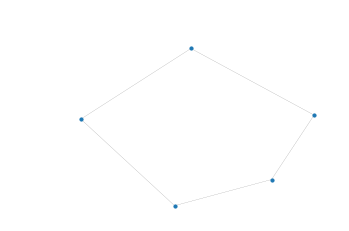

In [29]:
pos = fruchterman_reingold(G,200)
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)

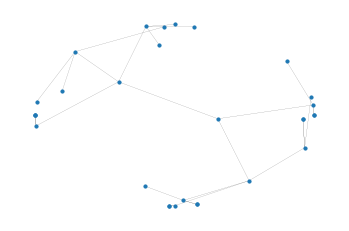

In [35]:
G = nx.full_rary_tree(3,30)

# initial position
for v in nx.nodes(G):
    G.nodes[v]['x'] = W*random()
    G.nodes[v]['y'] = L*random()
    
pos = {}
for v in G.nodes():
    pos[v] = [G.nodes[v]['x'],G.nodes[v]['y']]
    
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)
pos = fruchterman_reingold(G,1000)

plt.close()
plt.ylim([-0.1,1.1])
plt.xlim([-0.1,1.1])
plt.axis('off')
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)